In [2]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import uniform
import scipy.stats as sc
import matplotlib.pyplot as plt

import sys

sys.path.append(
    r"C:\Users\RamakrishnaVenkitakr\OneDrive - Pixel Photonics GmbH\codes\Scattering-Structures\scattering_structure"
)

sys.path.insert(0,
    r".\Scattering-Structures\scattering_structure"
)

from scattering_structure import ScatteringStructure

# Structure Factor calculation

Structure factor is a Fourier quantity that quantifies the extend of periodic nature a certain distribution holds. \
structure factors S is given as a function of the wave vector for N particle system is: $$S(\mathbf{q}) = \frac{1}{N}\left|\sum_{j = 1}^{N} e^{-\mathrm{i}\mathbf{q.r_j}}\right|^2$$

In [3]:
def structure_factor(x,y,kx,ky):
    
    no_particle = len(x)*len(y)
    
    Kx, Ky,x_pos = np.meshgrid(kx,ky,x)
    Kx, Ky,y_pos = np.meshgrid(kx,ky,y)

    Argument = Kx*x_pos + Ky*y_pos

    cosQ = np.sum(np.cos(Argument), axis = 2)
    sinQ = np.sum(np.sin(Argument), axis = 2)

    S = (cosQ**2 + sinQ**2)/no_particle
   
    return S

In [4]:
def ploting_xy_s(x,y,scatterer_radius, periodicity, kx,ky,S):
        
        theta = np.linspace( 0 , 2 * np.pi , 150 )

        rad = 2*np.pi/periodicity
        
        a = rad * np.cos( theta )
        b = rad * np.sin( theta )
        
        fig = plt.figure(figsize=(15, 5), dpi=80)

        # Create a scatter plot with marker size
        if scatterer_radius > 0.5:
            plt.subplot(1, 2, 1)
            plt.scatter(x, y, s=np.pi * scatterer_radius**2)
        else:
            plt.subplot(1, 2, 1)
            plt.scatter(x, y, s=1)  # To make point particles visible
        # Set aspect ratio to equal
        # plt.gca().set_aspect("equal")
        plt.xlabel("μm", fontsize=15)
        plt.xticks(fontsize=15)
        plt.ylabel("μm", fontsize=15)
        plt.yticks(fontsize=15)

        plt.subplot(1, 2, 2)
        plt.pcolormesh(kx,ky,S, cmap = 'viridis', vmin=0, vmax=1) 
        plt.plot( a, b, color="red", label = 'Period' )
        plt.colorbar(location="right")
        plt.xlabel("$k_x$", fontsize=15);
        plt.xticks(fontsize=15)
        plt.ylabel("$k_y$", fontsize=15);
        plt.yticks(fontsize=15)
        plt.legend()

        # Display the plot
        plt.show()

# Square Lattice

Is a 2D lattice with translational symmetry along both axes. The period denoted by $a$ (in microns) determines the distance between the particles

FROM SCATTERING_STRUCTURE FUNCTION

Density =  0.5026548245743669 /um^2


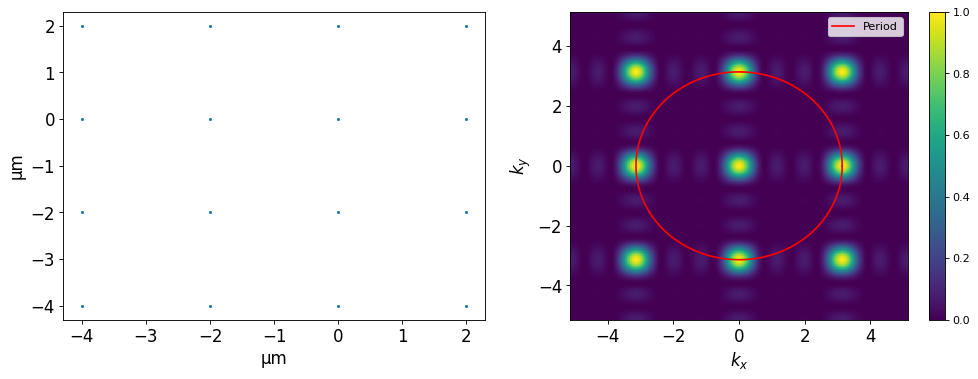

In [5]:
periodicity =2
scatterer_radius = 1

rect = ScatteringStructure(geometry={'type': 'box', 'lx': 10, 'ly': 10},
                           arrangement={'type':'rectangular', 'dist': periodicity},
                           scatterer_radius=scatterer_radius
                           )
# rect.plot_distribution()
rect_rms = rect.rms()
rect_density = rect.density()

# print for further use
print('Density = ', rect_density, '/um^2')

x, y = zip(*rect.points)

kx = np.linspace(-2*np.pi/periodicity -2,2*np.pi/periodicity+2,num=500) #np.linspace(-2*np.pi/max(x),2*np.pi/max(x),num = len(x), endpoint=True)
ky = np.linspace(-2*np.pi/periodicity-2,2*np.pi/periodicity+2,num=500) #np.linspace(-2*np.pi/max(y),2*np.pi/max(y),num = len(x), endpoint=True)

S_test = structure_factor(x,y,kx,ky)

ploting_xy_s(x,y,scatterer_radius,periodicity, kx,ky,S_test)


DIRECT DEFINITION

# Triangular/Hexagonal lattice



Density =  0.0502654824574367 /um^2


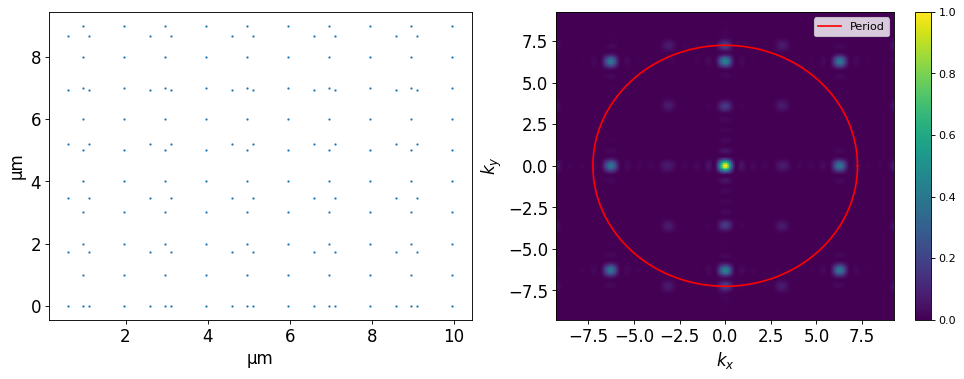

In [6]:
periodicity = 1
scatterer_radius = 0.1

rect = ScatteringStructure(geometry={'type': 'box', 'lx': 10, 'ly': 10},
                           arrangement={'type':'tetrahedral', 'dist': periodicity},
                           scatterer_radius=scatterer_radius
                           )
# rect.plot_distribution()
rect_rms = rect.rms()
rect_density = rect.density()

# print for further use
print('Density = ', rect_density, '/um^2')

x, y = zip(*rect.points)

periodicity = periodicity * np.sqrt(3)/2

kx = np.linspace(-2*np.pi/periodicity -2,2*np.pi/periodicity+2,num=500) #np.linspace(-2*np.pi/max(x),2*np.pi/max(x),num = len(x), endpoint=True)
ky = np.linspace(-2*np.pi/periodicity-2,2*np.pi/periodicity+2,num=500) #np.linspace(-2*np.pi/max(y),2*np.pi/max(y),num = len(x), endpoint=True)

S_test = structure_factor(x,y,kx,ky)

ploting_xy_s(x,y,scatterer_radius,periodicity, kx,ky,S_test)


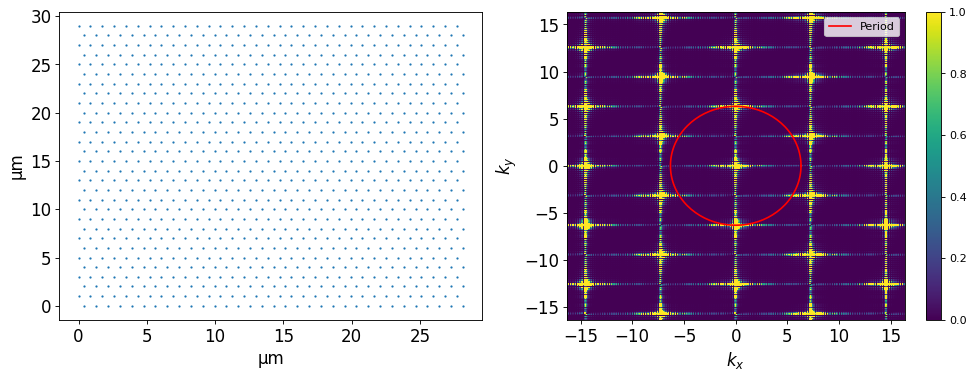

In [8]:
N = 1000

ratio = np.sqrt(3)/2 # cos(60°)
N_X = int(np.sqrt(N/ratio))
N_Y = N // N_X
xv, yv = np.meshgrid(np.arange(N_X), np.arange(N_Y), sparse=False, indexing='xy')
xv = xv * ratio
xv[::2, :] += ratio/2

periodicity = 1.15*ratio

kx = np.linspace(-2*np.pi/periodicity-10 ,2*np.pi/periodicity+10,num=500) #np.linspace(-2*np.pi/max(x),2*np.pi/max(x),num = len(x), endpoint=True)
ky = np.linspace(-2*np.pi/periodicity-10,2*np.pi/periodicity+10,num=500) #np.linspace(-2*np.pi/max(y),2*np.pi/max(y),num = len(x), endpoint=True)

S_test = structure_factor(xv,yv,kx,ky)

ploting_xy_s(xv,yv,0.1,periodicity, kx,ky,S_test)